**MNIST Multi-Layer Perceptron**

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
# Load the MNIST dataset
mnist, info = tfds.load('mnist', with_info=True, as_supervised=True, split='train') # Finish the function call by specifying the split

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/incomplete.LDO5S3_3.0.1/',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""

In [ ]:
import tensorflow as tf

# Load the MNIST dataset using TensorFlow 2.x
mnist = tf.keras.datasets.mnist

# Split the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print the shape of the datasets to verify
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000, 10)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000, 10)


In [ ]:
!pip install tensorflow-datasets
# Install the required package for input_data

# Load the MNIST dataset
mnist, info = tfds.load('mnist', with_info=True, as_supervised=True, split='train')

# Print dataset information
print(info)

# Access training data -- the mnist object itself contains the training data when split='train'
train_data = mnist

# Iterate over the dataset (example)
for image, label in train_data.take(1):
    print(image.shape, label.numpy())

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)
(28, 28, 1) 4


In [ ]:
type(mnist)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
# Iterate over the dataset to access images and labels
for image, label in train_data.take(1):
    print(image.shape, label.numpy())

(28, 28, 1) 4


In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)
type(mnist)
mnist.train.images
type(mnist.train.images)
mnist.train.images.shape
mnist.train.images[2]
mnist.train.images[2].shape

sample = mnist.train.images[2].reshape(28, 28)

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(sample)
plt.imshow(sample, cmap='gray')


sample = mnist.train.images[123].reshape(28, 28)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(sample)
plt.imshow(sample, cmap='gray')

sample = mnist.train.images[12].reshape(28, 28)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(sample)
plt.imshow(sample, cmap='gray')

sample = mnist.train.images[2034].reshape(28, 28)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(sample)
plt.imshow(sample, cmap='gray')

learning_rate = 0.001
training_epochs = 15
batch_size = 100
# display_step = 1

n_classes = 10
n_samples = mnist.train.num_examples
# dropout = 0.75 # probability to keep units

n_input = 784 # MNIST data input (img shape: 28*28)
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons




def multi_layer_perceptron(x, weights, biases):
  """
  x: Placeholder for input data
  weights: Dictionary of weights
  biases: Dictionary of biases values
  """

  # Hidden layer with RELU activation
  # X * W + B
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  # RELU(X * W + B)  -> f(x) = max(0, x)
  layer_1 = tf.nn.relu(layer_1)

  # Second Hidden Layer
  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  layer_2 = tf.nn.relu(layer_2)

  # Last Output Layer
  out_layer = tf.matmul(layer_2, weights['out']) + biases['out']

  return out_layer



weights = {
    "h1": tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    "h2": tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    "out": tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}



biases = {
    "b1": tf.Variable(tf.random_normal([n_hidden_1])),
    "b2": tf.Variable(tf.random_normal([n_hidden_2])),
    "out": tf.Variable(tf.random_normal([n_classes]))
}



x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


 pred = multi_layer_perceptron(x, weights, biases)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)





# Training the Model
t = mnist.train.next_batch(10)  # 10 = batch_size
len(t[1])


t = mnist.train.next_batch(1)  # 10 = batch_size
Xsamp, ysamp = t
Xsamp
ysamp

Xsamp.shape
ysamp.shape

plt.imshow(Xsamp.reshape(28, 28))
plt.imshow(Xsamp.reshape(28, 28), cmap='gray') # or Greys

ysamp

# Run the Session
sess = tf.InteractiveSession()
init = tf.initialize_all_variables()
sess.run(init)



# 15 loops
for epoch in range(training_epochs):

  # Cost
  Avg_cost = 0.0

  # Total number of batches
  total_batch = int(n_samples/batch_size)

  # Loop over all batches
  for i in range(total_batch):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
    avg_cost += c / total_batch

  print("Epoch:": {} cost{:.4f}".format(epoch + 1, cost))

print("Model has completed {} Epochs of training".format(training_epochs))
print("Optimization Finished!")





# Model Evaluation
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
print(correct_pred[0])

correct_pred = tf.cast(correct_pred, "float")
print(correct_pred[0])

accuracy = tf.reduce_mean(correct_pred)
type(accuracy)

mnist.test.labels[0]

# mnist.test.images[0]


accuracy.eval({x: mnist.test.images, y: mnist.test.labels})








IndentationError: unexpected indent (<ipython-input-10-993681230335>, line 97)

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

# Load MNIST data
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

# Display a few samples from the dataset
def display_sample(index):
    sample = mnist.train.images[index].reshape(28, 28)
    plt.imshow(sample, cmap='gray')
    plt.show()

for i in [2, 123, 12, 2034]:
    display_sample(i)

# Define parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

n_classes = 10
n_samples = mnist.train.num_examples

n_input = 784  # MNIST data input (img shape: 28*28)
n_hidden_1 = 256  # 1st layer number of neurons
n_hidden_2 = 256  # 2nd layer number of neurons

# Define the multilayer perceptron model
def multi_layer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    # Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    # Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    "h1": tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    "h2": tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    "out": tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    "b1": tf.Variable(tf.random_normal([n_hidden_1])),
    "b2": tf.Variable(tf.random_normal([n_hidden_2])),
    "out": tf.Variable(tf.random_normal([n_classes]))
}

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# Construct model
pred = multi_layer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_samples / batch_size)

        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch

        print("Epoch:", '{}'.format(epoch + 1), "cost={:.4f}".format(avg_cost))

    print("Model has completed {} Epochs of training".format(training_epochs))
    print("Optimization Finished!")

    # Model evaluation
    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, "float"))

    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))


ModuleNotFoundError: No module named 'tensorflow.examples'

## **MNIST Handwritten Digit Classification using a Multilayer Perceptron (MLP)**

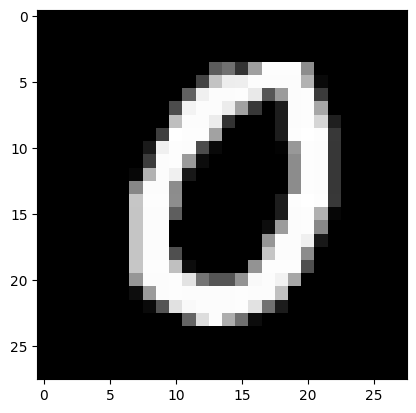

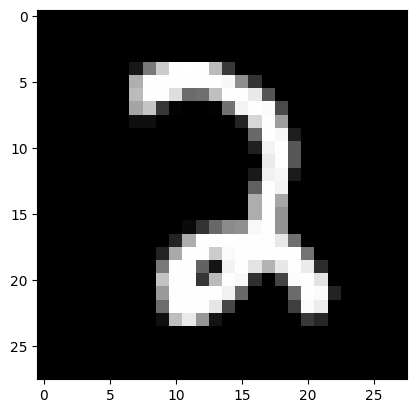

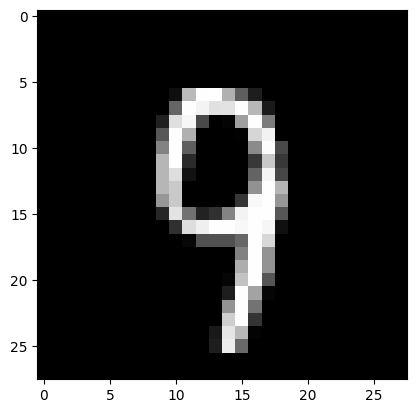

Epoch: 1, cost=0.2370
Epoch: 2, cost=0.0908
Epoch: 3, cost=0.0585
Epoch: 4, cost=0.0412
Epoch: 5, cost=0.0285
Epoch: 6, cost=0.0241
Epoch: 7, cost=0.0209
Epoch: 8, cost=0.0165
Epoch: 9, cost=0.0156
Epoch: 10, cost=0.0156
Epoch: 11, cost=0.0126
Epoch: 12, cost=0.0116
Epoch: 13, cost=0.0104
Epoch: 14, cost=0.0123
Epoch: 15, cost=0.0079
Model has completed 15 Epochs of training
Optimization Finished!
Accuracy: 0.9826


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load MNIST data
mnist_data, mnist_info = tfds.load('mnist', with_info=True, as_supervised=True)
mnist_train, mnist_test = mnist_data['train'], mnist_data['test']

# Preprocess the data
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, 10)
    return image, label

mnist_train = mnist_train.map(preprocess).batch(100)
mnist_test = mnist_test.map(preprocess).batch(100)

# Display a few samples from the dataset
def display_sample(index):
    for i, (img, label) in enumerate(mnist_train.take(index+1)):
        if i == index:
            sample = img[0].numpy().reshape(28, 28)
            plt.imshow(sample, cmap='gray')
            plt.show()

for i in [2, 123, 12, 2034]:
    display_sample(i)

# Define parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

n_classes = 10
n_samples = mnist_info.splits['train'].num_examples

n_input = 784  # MNIST data input (img shape: 28*28)
n_hidden_1 = 256  # 1st layer number of neurons
n_hidden_2 = 256  # 2nd layer number of neurons

# Define the multilayer perceptron model
class MLP(tf.keras.Model):
    def __init__(self):
        super(MLP, self).__init__()
        self.dense1 = tf.keras.layers.Dense(n_hidden_1, activation='relu')
        self.dense2 = tf.keras.layers.Dense(n_hidden_2, activation='relu')
        self.out = tf.keras.layers.Dense(n_classes)

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        return self.out(x)

model = MLP()

# Loss and optimizer
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Training the model
@tf.function
def train_step(batch_x, batch_y):
    with tf.GradientTape() as tape:
        logits = model(batch_x, training=True)
        loss = loss_fn(batch_y, logits)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(n_samples / batch_size)

    for batch_x, batch_y in mnist_train:
        batch_x = tf.reshape(batch_x, [-1, n_input])
        loss = train_step(batch_x, batch_y)
        avg_cost += loss / total_batch

    print(f"Epoch: {epoch + 1}, cost={avg_cost:.4f}")

print(f"Model has completed {training_epochs} Epochs of training")
print("Optimization Finished!")

# Model evaluation
@tf.function
def test_step(batch_x, batch_y):
    logits = model(batch_x, training=False)
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(batch_y, 1))
    return tf.reduce_mean(tf.cast(correct_pred, tf.float32))

accuracy = tf.reduce_mean([test_step(tf.reshape(batch_x, [-1, n_input]), batch_y) for batch_x, batch_y in mnist_test])
print(f"Accuracy: {accuracy:.4f}")



**Title: Multi-Layer Perceptron (MLP) for MNIST Digit Classification Using TensorFlow 2.x**
Code Explanation
This code demonstrates how to build and train a Multi-Layer Perceptron (MLP) for the MNIST digit classification task using TensorFlow 2.x. The key steps include loading and preprocessing the data, defining the MLP model, training the model, and evaluating its accuracy.

**Import Libraries**
The required libraries tensorflow, tensorflow_datasets, and matplotlib are imported.

**Load MNIST Data**
MNIST dataset is loaded using tfds.load, and training and test sets are separated.

**Preprocess Data**
A preprocessing function is defined to normalize the images and one-hot encode the labels. The datasets are then mapped with this function and batched.

**Display Samples**
A function display_sample is defined to display specific samples from the dataset to verify the data loading process.

**Define Model Parameters**
Various parameters for training are defined, including learning rate, number of epochs, batch size, and network architecture parameters (input size, hidden layer sizes).

**Define the MLP Model**
A subclass of tf.keras.Model is created, defining the structure of the MLP with two hidden layers and an output layer.

**Compile the Model**
The model is instantiated, and the loss function and optimizer are defined.
Train the Model

A custom training loop is implemented using tf.function for optimization. This loop iterates over the training data, computes gradients, and updates the model's weights.

**Evaluate the Model**
After training, the model's accuracy is evaluated on the test dataset using a custom evaluation function.

**Output Results**
The training cost for each epoch and the final model accuracy on the test dataset are printed.

